In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("anti-malware .csv")
df.head()

,NtDuplicateObject,NtOpenSection,CoUninitialize,RegCloseKey,LdrUnloadDll,DrawTextExW,GetSystemInfo,RegQueryValueExA,getaddrinfo,WSAStartup,...,CreateRemoteThreadEx,NtCreateDirectoryObject,EnumServicesStatusA,NtShutdownSystem,NtCreateProcessEx,NotifyBootConfigStatus,NtSaveKey,system,WNetGetProviderNameW,OUTPUT
0,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,2,0,10,0,4,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,5,2,2,96,2,15,3,116,2,1,...,0,0,0,0,0,0,0,0,0,1
3,9,13,5,662,37,0,0,405,0,1,...,0,0,0,0,0,0,0,0,0,1
4,3,2,2,94,3,17,4,116,2,1,...,0,0,0,0,0,0,0,0,0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11261 entries, 0 to 11260
Columns: 312 entries, NtDuplicateObject to OUTPUT
dtypes: int64(312)
memory usage: 26.8 MB


In [9]:
df.dropna(inplace=True)
#checking the null values again
df.isnull().sum()

NtDuplicateObject         0
NtOpenSection             0
CoUninitialize            0
RegCloseKey               0
LdrUnloadDll              0
                         ..
NotifyBootConfigStatus    0
NtSaveKey                 0
system                    0
WNetGetProviderNameW      0
OUTPUT                    0
Length: 312, dtype: int64

In [12]:
x = df.drop(columns=['OUTPUT'], axis=1)
y = df['OUTPUT']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
stn = StandardScaler()
X_train = stn.fit_transform(X_train)
X_test = stn.fit_transform(X_test)

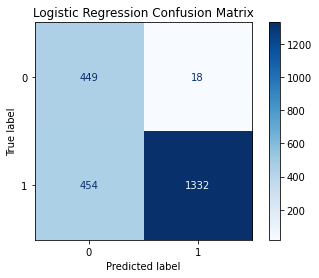

              precision    recall  f1-score   support

           0       0.50      0.96      0.66       467
           1       0.99      0.75      0.85      1786

    accuracy                           0.79      2253
   macro avg       0.74      0.85      0.75      2253
weighted avg       0.89      0.79      0.81      2253



In [19]:
lg = LogisticRegression(max_iter=1000)
lg.fit(X_train, y_train)
ypred_lg = lg.predict(X_test)

cm_lg = confusion_matrix(y_test, ypred_lg)
cm_lg_disp = ConfusionMatrixDisplay(cm_lg)
cm_lg_disp.plot(cmap=plt.cm.Blues)
plt.title("Logistic Regression Confusion Matrix")
plt.show()

print(classification_report(y_test, ypred_lg))

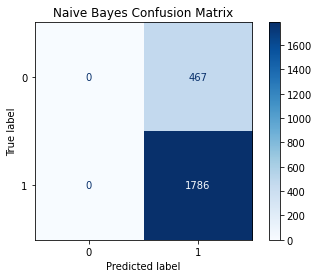

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       467
           1       0.79      1.00      0.88      1786

    accuracy                           0.79      2253
   macro avg       0.40      0.50      0.44      2253
weighted avg       0.63      0.79      0.70      2253



C:\Users\USer\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USer\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USer\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
#naive bayes model
gn = GaussianNB()
gn.fit(X_train, y_train)
ypred_gn = gn.predict(X_test)

cm_gn = confusion_matrix(y_test, ypred_gn)
cm_gn_disp = ConfusionMatrixDisplay(cm_gn)
cm_gn_disp.plot(cmap=plt.cm.Blues)
plt.title("Naive Bayes Confusion Matrix")
plt.show()

print(classification_report(y_test, ypred_gn))